In [1]:
import numpy as np
import matplotlib.pyplot as plt
import minimint

In [2]:
# list available filters
print (minimint.list_filters())

['DECam_u', 'DECam_g', 'DECam_r', 'DECam_i', 'DECam_z', 'DECam_Y', 'GALEX_FUV', 'GALEX_NUV', 'PS_g', 'PS_r', 'PS_i', 'PS_z', 'PS_y', 'PS_w', 'PS_open', 'SDSS_u', 'SDSS_g', 'SDSS_r', 'SDSS_i', 'SDSS_z', 'SkyMapper_u', 'SkyMapper_v', 'SkyMapper_g', 'SkyMapper_r', 'SkyMapper_i', 'SkyMapper_z', 'Bessell_U', 'Bessell_B', 'Bessell_V', 'Bessell_R', 'Bessell_I', '2MASS_J', '2MASS_H', '2MASS_Ks', 'Kepler_Kp', 'Kepler_D51', 'Hipparcos_Hp', 'Tycho_B', 'Tycho_V', 'Gaia_G_DR2Rev', 'Gaia_BP_DR2Rev', 'Gaia_RP_DR2Rev', 'Gaia_G_MAW', 'Gaia_BP_MAWb', 'Gaia_BP_MAWf', 'Gaia_RP_MAW', 'TESS', 'Gaia_G_EDR3', 'Gaia_BP_EDR3', 'Gaia_RP_EDR3', 'WISE_W1', 'WISE_W2', 'WISE_W3', 'WISE_W4', 'VISTA_Z', 'VISTA_Y', 'VISTA_J', 'VISTA_H', 'VISTA_Ks']


In [3]:
filters = ['DECam_g','DECam_r', "Gaia_G_EDR3", "Gaia_BP_EDR3", 'Gaia_RP_EDR3',
          'WISE_W1','WISE_W2']
# Filter's I'm going to retrieve

In [4]:
# Define interpolation object
ii = minimint.Interpolator(filters)

(20.0, -5.0)

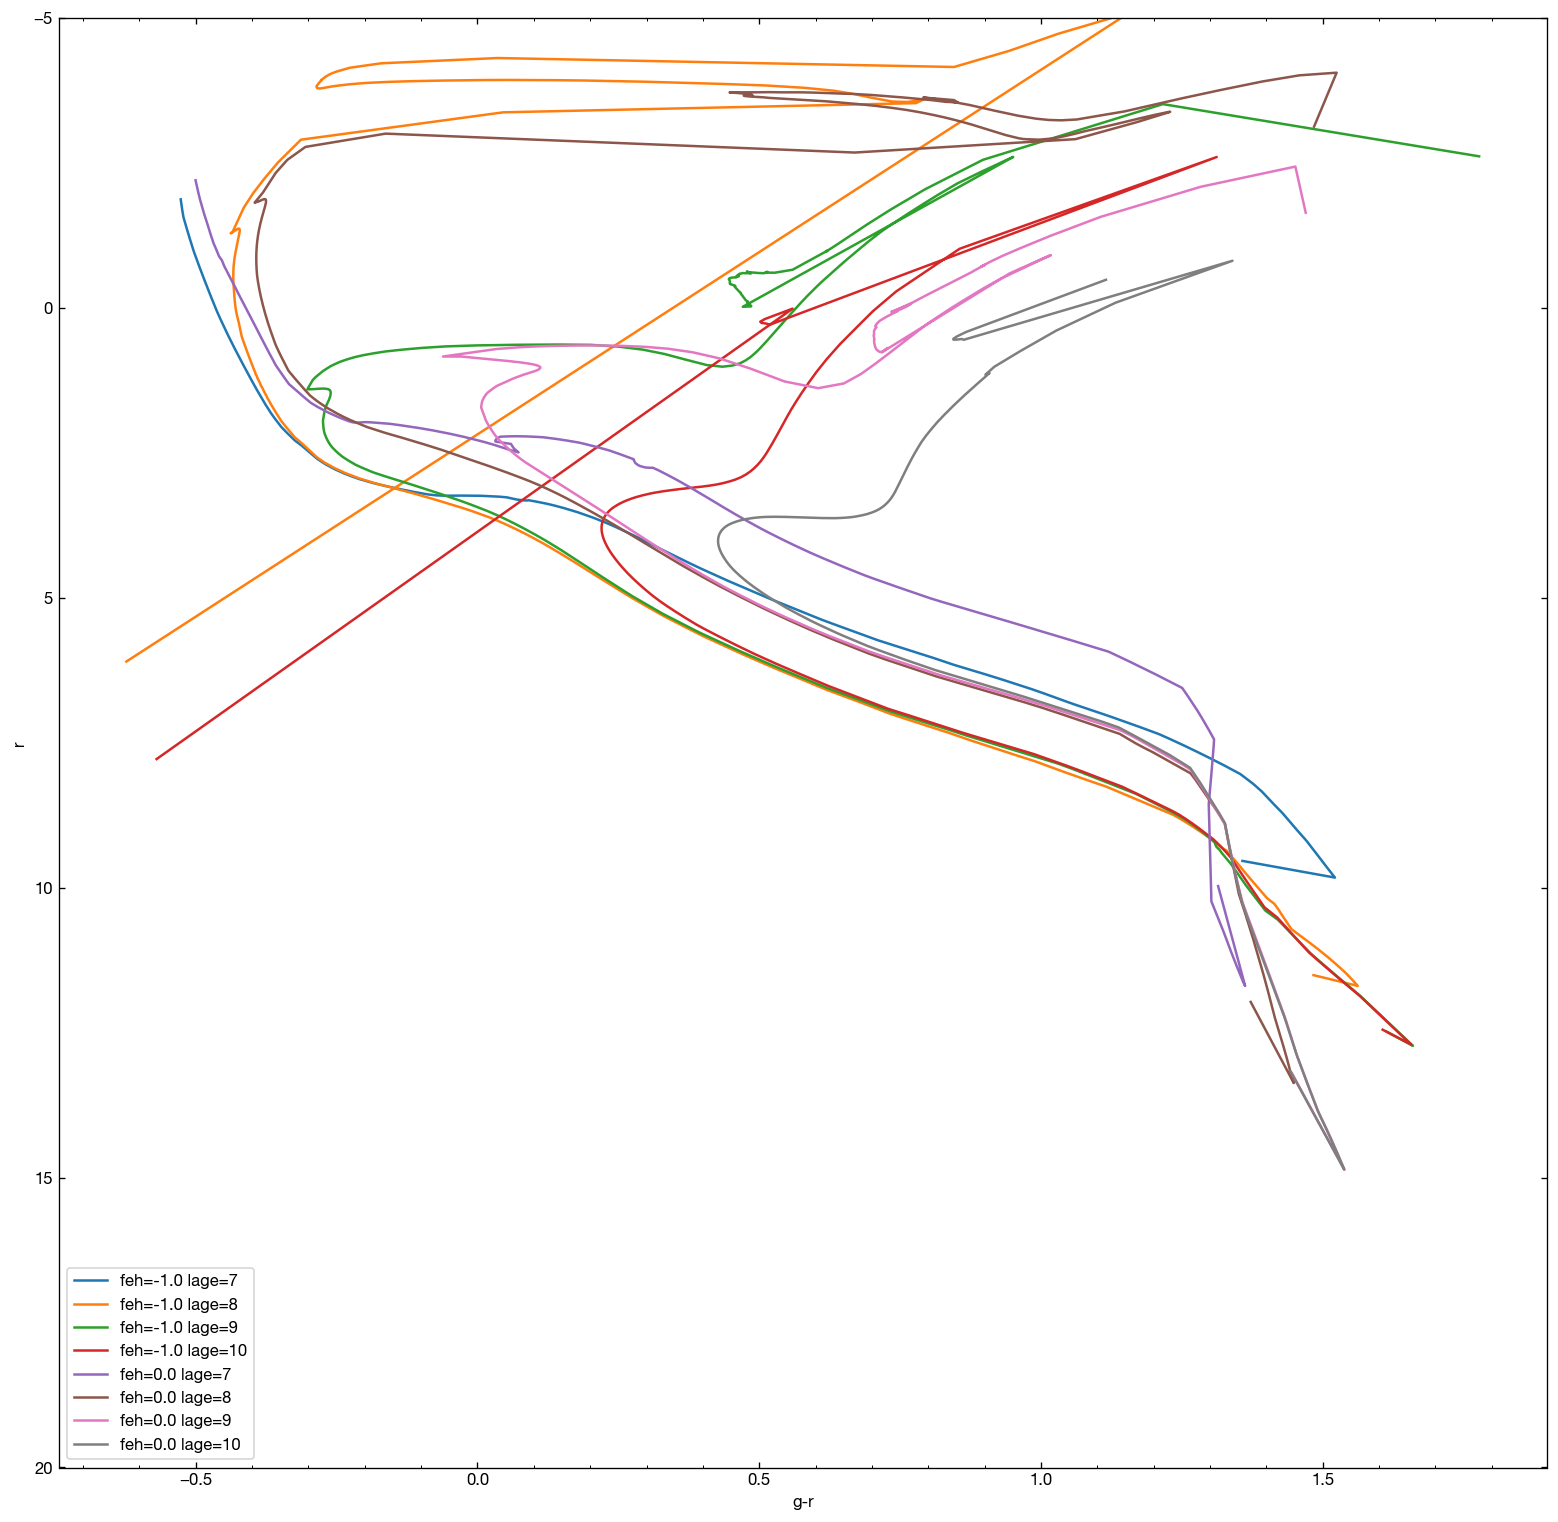

In [5]:
# Compute the isochrones
massgrid = 10**np.linspace(np.log10(0.1),np.log10(10), 10000)
logagegrid = [7, 8, 9, 10]
fehgrid = [-1, 0]
fig = plt.figure(figsize=(16, 16), dpi=120)
for feh in fehgrid:
    for lage in logagegrid:
        iso = ii(massgrid, lage, feh)
        plt.plot(iso['DECam_g']-iso['DECam_r'], iso['DECam_r'],
                 label='feh=%.1f lage=%d' % (feh, lage))
plt.legend()
plt.xlabel('g-r')
plt.ylabel('r')
plt.ylim(20, -5)

(-0.2, 1.5)

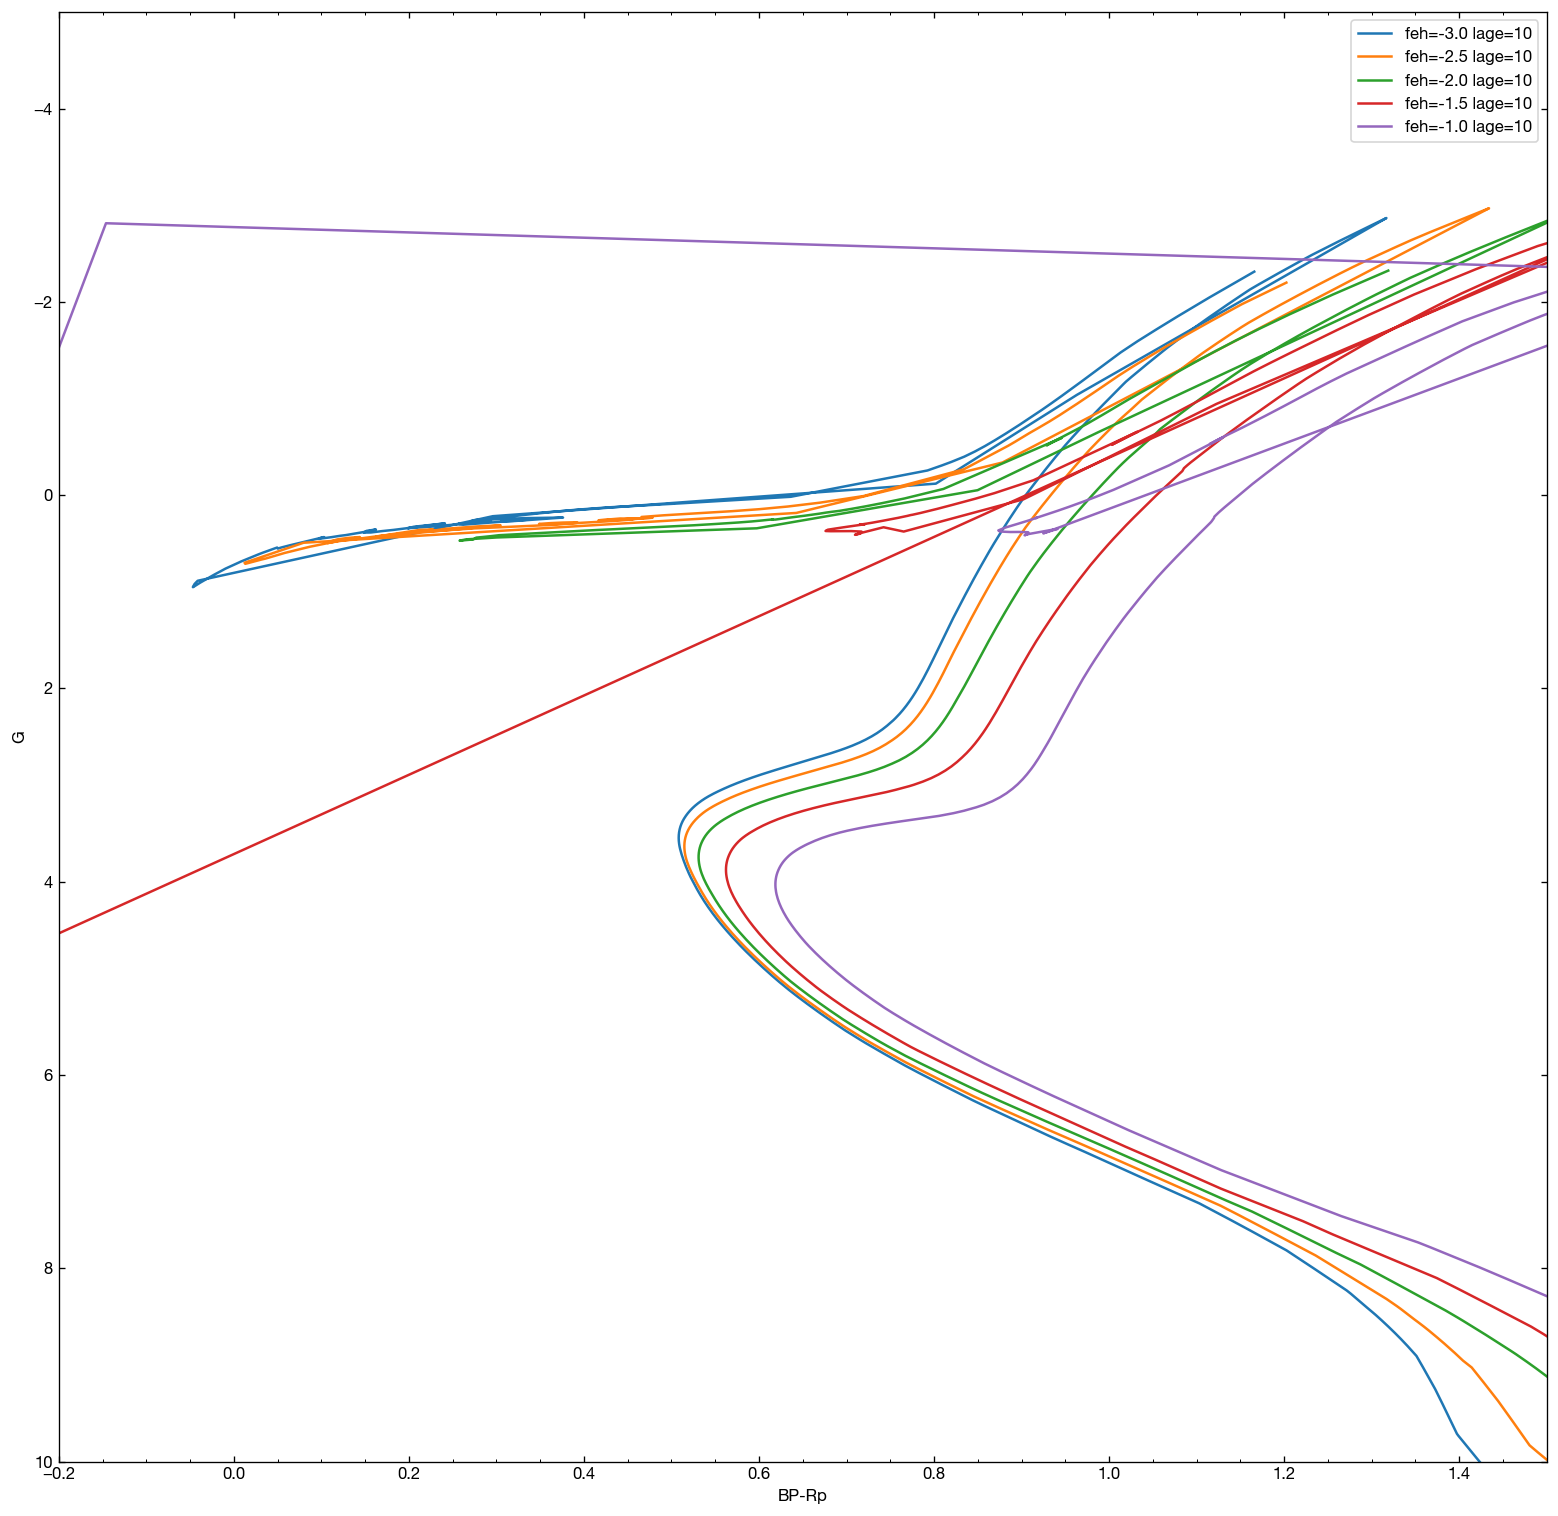

In [6]:
massgrid = np.linspace(0.1,0.9, 100000)

fig = plt.figure(figsize=(16, 16), dpi=120)
for feh in [-3,-2.5,-2,-1.5,-1]:
    for lage in [10.1]:
        iso = ii(massgrid, lage, feh)
        plt.plot(iso['Gaia_BP_EDR3']-iso['Gaia_RP_EDR3'], iso['Gaia_G_EDR3'],
                 label='feh=%.1f lage=%d' % (feh, lage))
plt.legend()
plt.xlabel('BP-Rp')
plt.ylabel('G')
plt.ylim(10, -5)
plt.xlim(-.2,1.5)

(5.0, -5.0)

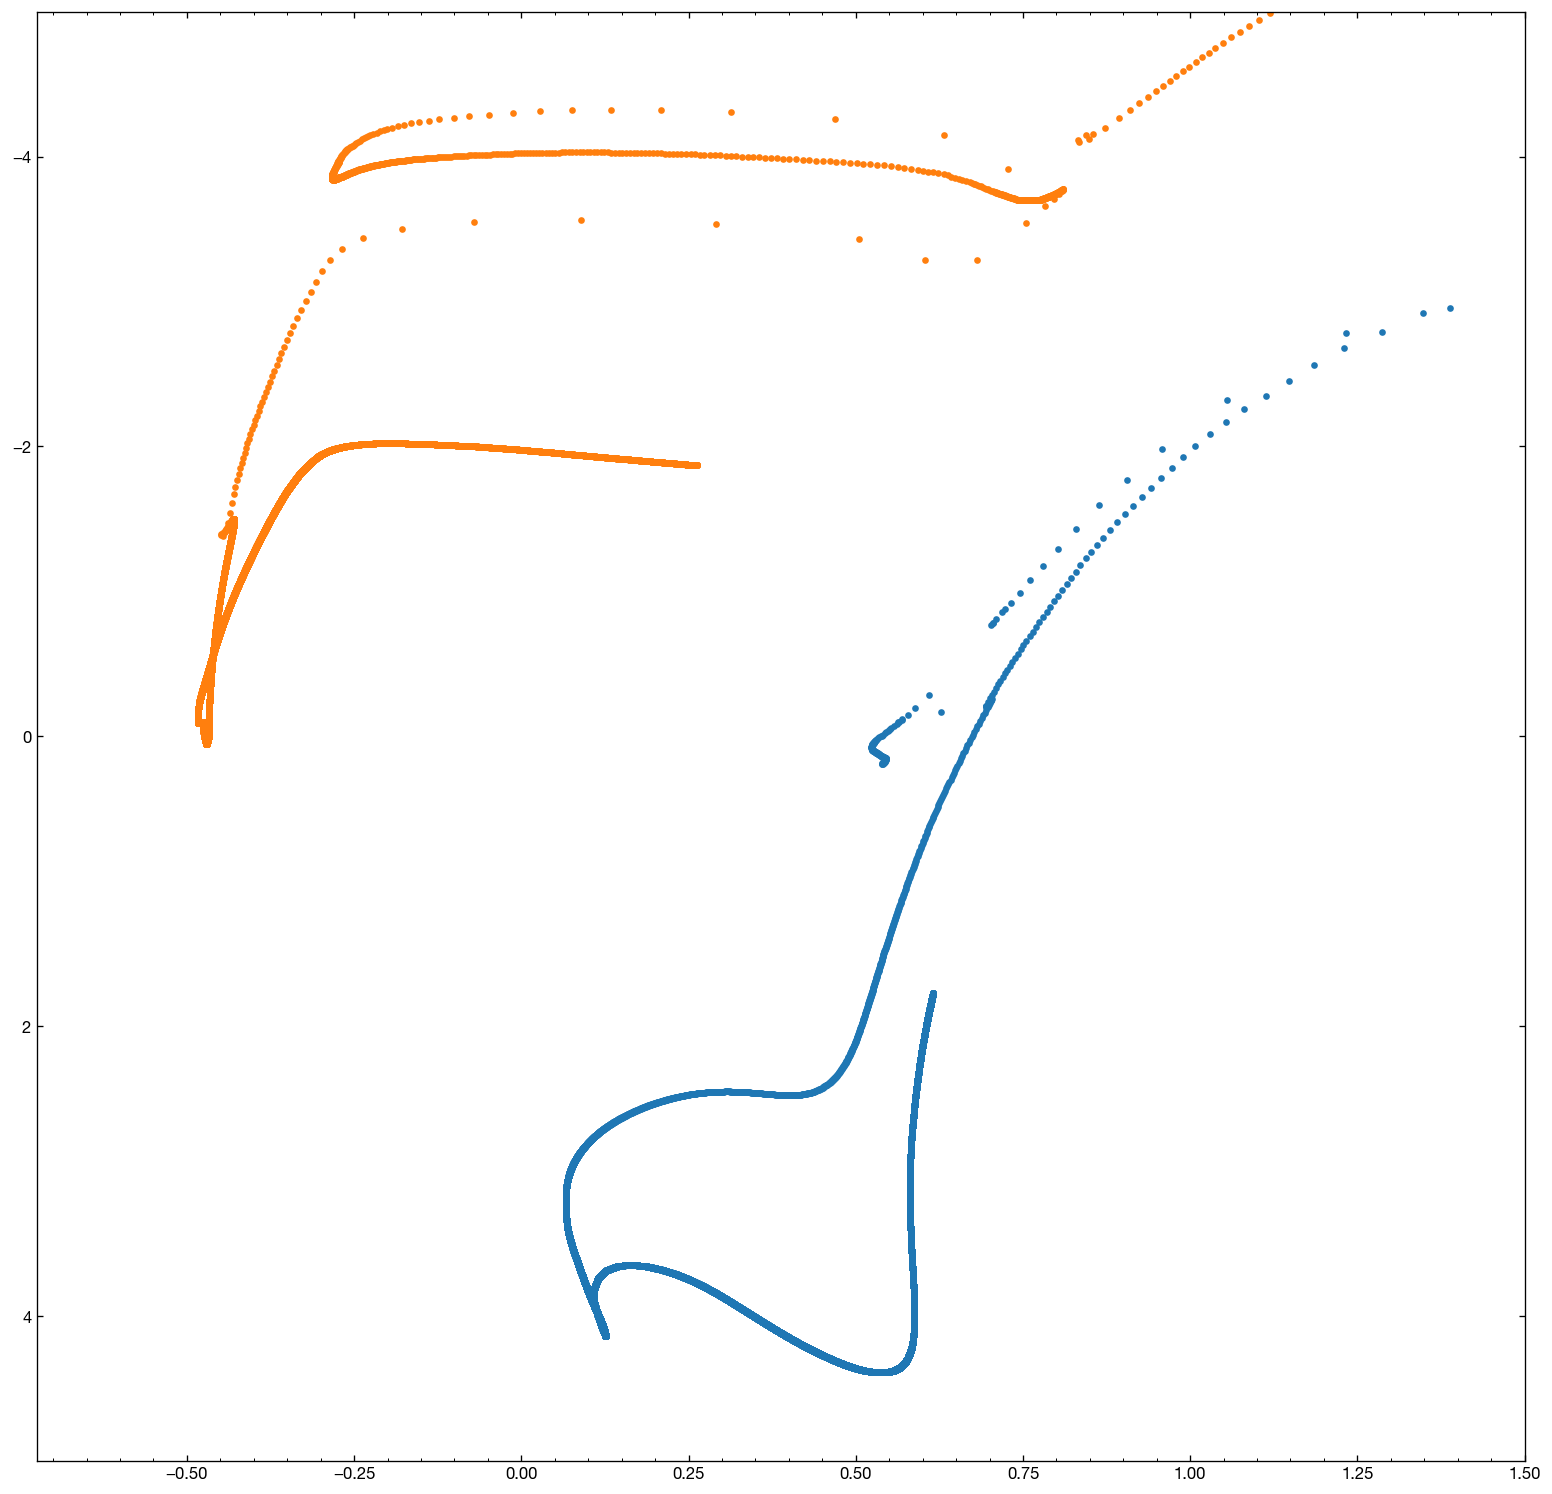

In [7]:
# Compute the evolutionary track

lagegrid = np.linspace(5,10.1,100000)
fig = plt.figure(figsize=(16, 16), dpi=120)
mass = 1.04
iso1 = ii(mass, lagegrid, -1)
mass = 5.04
iso2 = ii(mass, lagegrid, -1)
plt.plot(iso1['DECam_g']-iso1['DECam_r'],iso1['DECam_r'],'.')
plt.plot(iso2['DECam_g']-iso2['DECam_r'],iso2['DECam_r'],'.')
plt.ylim(5,-5)


Text(0, 0.5, 'log g')

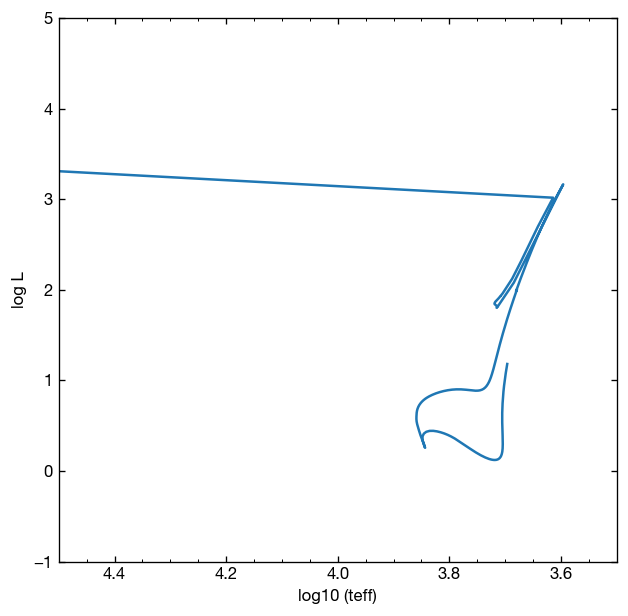

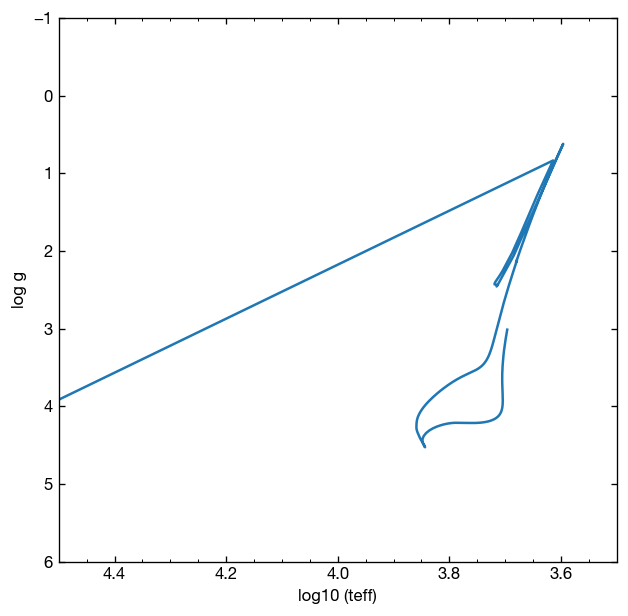

In [8]:
# In theoretical coordinates log(l) vs logteff and logg vs logteff

lagegrid = np.linspace(5, 10., 50000)
fig = plt.figure(figsize=(6,6), dpi=120)
mass = 1.04
iso1 = ii(mass, lagegrid, -1)
plt.plot(iso1['logteff'], iso1['logl'])
plt.xlabel('log10 (teff)')
plt.ylabel('log L')
plt.xlim(4.5,3.5)
plt.ylim(-1,5)

fig = plt.figure(figsize=(6, 6), dpi=120)
plt.plot(iso1['logteff'], iso1['logg'])
plt.ylim(6,-1)
plt.xlim(4.5,3.5)
plt.xlabel('log10 (teff)')
plt.ylabel('log g')


(16.0, -10.0)

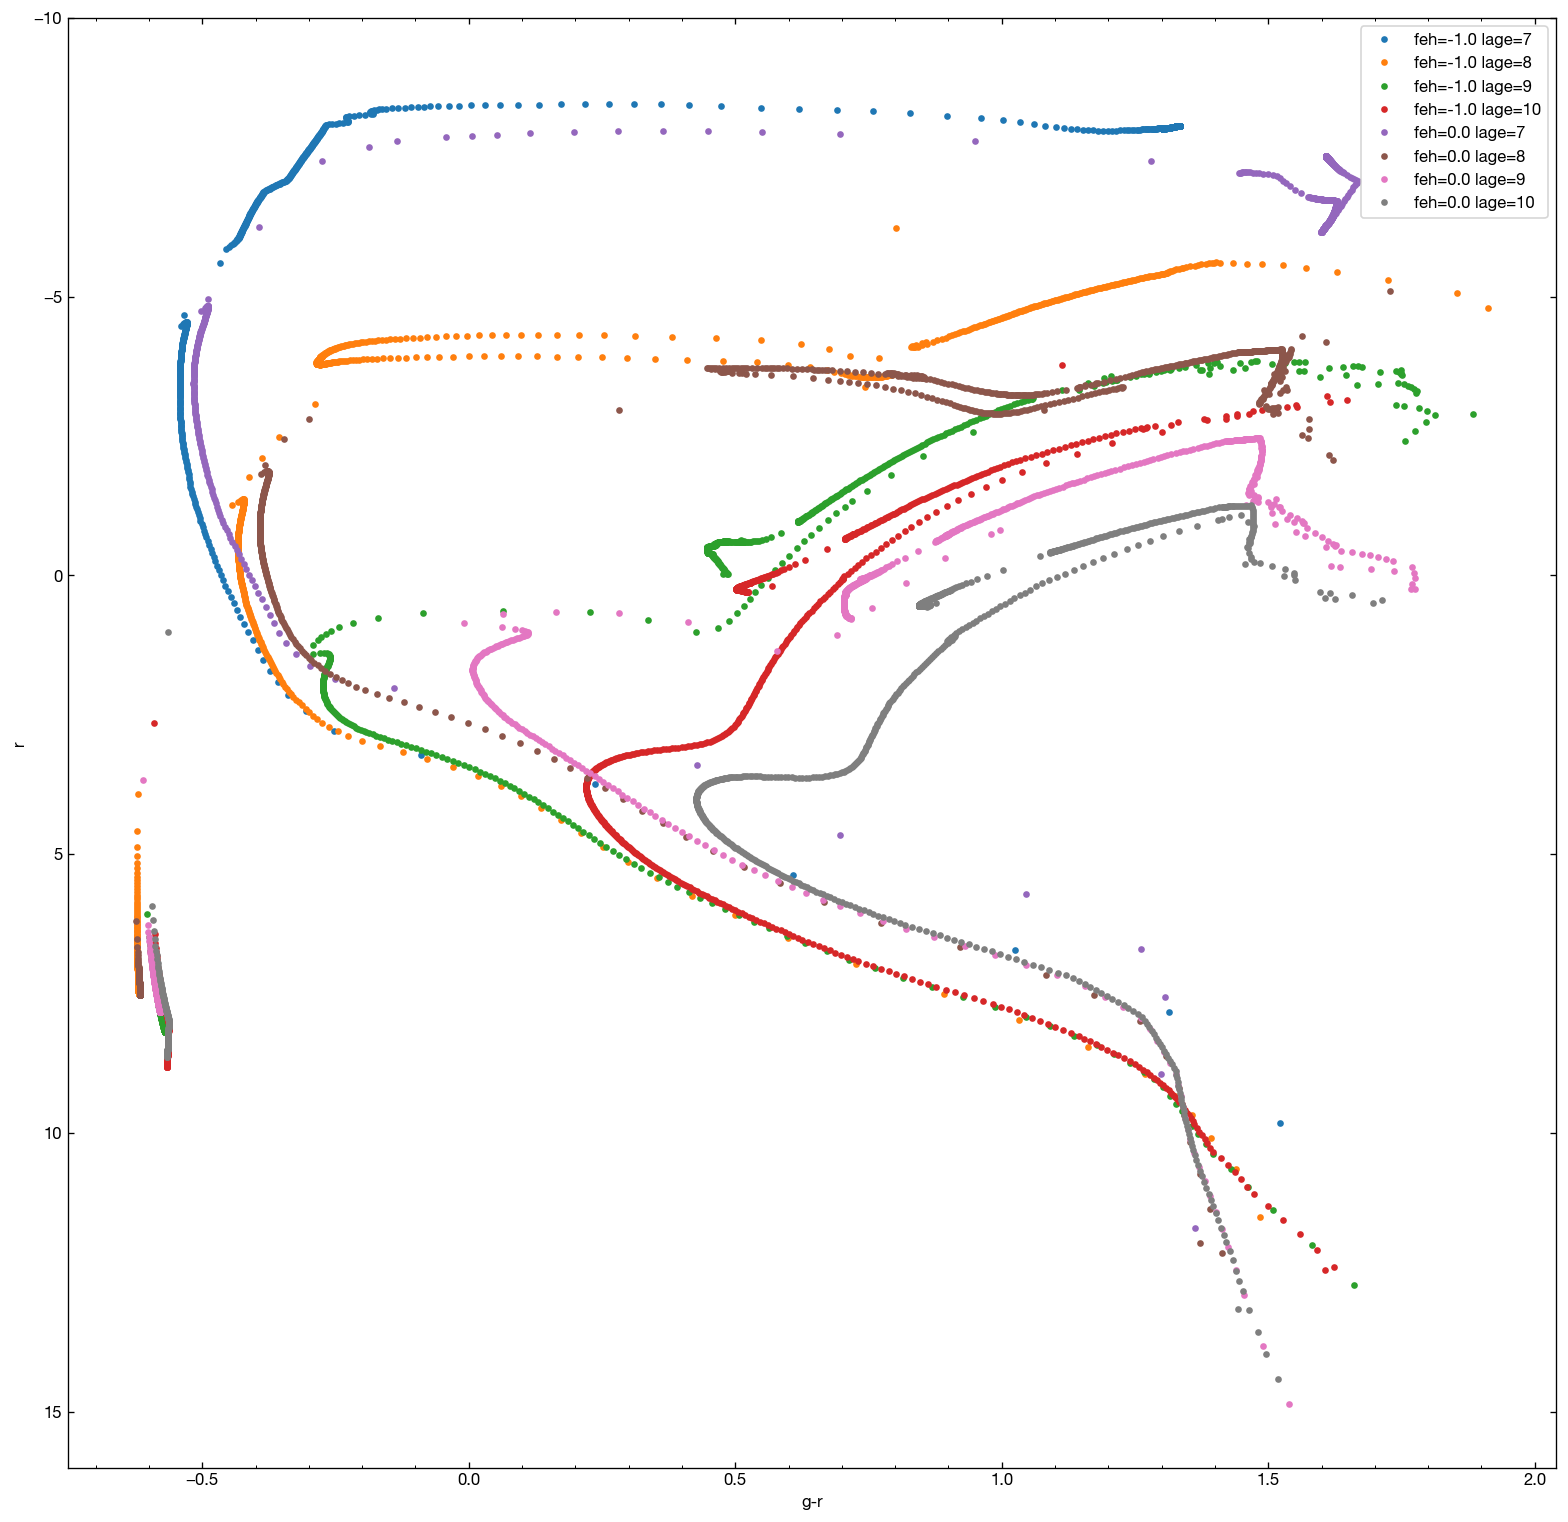

In [9]:
# Compute the isochrones using the maximum mass along each isochrone 
logagegrid = [7, 8, 9, 10]
fehgrid = [-1, 0]
fig = plt.figure(figsize=(16, 16), dpi=120)
for feh in fehgrid:
    for lage in logagegrid:
        maxmass = ii.getMaxMass(lage, feh) # maximum mass on the given isochrone
        minmass = 0.1
        massgrid = maxmass - (maxmass-minmass)*10**np.linspace(-5,0, 1000)
        iso = ii(massgrid, lage, feh)
        plt.plot(iso['DECam_g']-iso['DECam_r'], iso['DECam_r'],'.',
                 label='feh=%.1f lage=%d' % (feh, lage),)
plt.legend()
plt.xlabel('g-r')
plt.ylabel('r')
plt.ylim(16, -10)